In [1]:
## research question
## Given a claim and a topic, can we figure out if the claim is for or against the topic?

import numpy as np
import pandas as pd
import string
import nltk
from sklearn.linear_model import LogisticRegression
from utils import MyTokenizer, MySentences, MeanEmbeddingVectorizer, evaluate_train
import warnings
warnings.filterwarnings("ignore")

In [2]:
claimDF = pd.read_csv("IBM_EACL-2017.v1/claim_stance_dataset_v1.csv")

In [3]:
# 2394
# create dataset
test = claimDF[['claims.stance', 'claims.claimCorrectedText', 'topicSentiment']]

In [4]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores("HI BEN")

In [6]:
print ss

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [7]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(None)

test['claim_token'] = test['claims.claimCorrectedText'].apply(lambda x: nltk.word_tokenize(x.lower()))
test['claim_sentiment_compound']  = test['claim_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['compound'])
test['claim_sentiment_neg']  = test['claim_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['neg'])
test['claim_sentiment_neu']  = test['claim_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['neu'])
test['claim_sentiment_pos']  = test['claim_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['pos'])

# test['topic_token'] = test['topicText'].apply(lambda x: nltk.word_tokenize(x.lower()))
# test['topic_sentiment_compound']  = test['topic_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['compound'])
# test['topic_sentiment_neg']  = test['topic_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['neg'])
# test['topic_sentiment_neu']  = test['topic_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['neu'])
# test['topic_sentiment_pos']  = test['topic_token'].apply(lambda x: sid.polarity_scores(" ".join(x))['pos'])
# 
test['stance'] = test['claims.stance'].apply(lambda x: 0 if x == 'PRO' else 1)

In [8]:
test['final_embedding'] = test.apply(lambda x: [
    x['claim_sentiment_compound'],
    x['claim_sentiment_neg'],
    x['claim_sentiment_neu'],
    x['claim_sentiment_pos'],
    x['topicSentiment'],
], axis=1)


Train Log loss: 0.698119211405
Train Accuracy: 0.527568922306


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

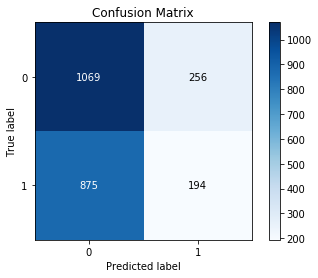

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

X = np.vstack(test['final_embedding'].as_matrix())
y = test['stance'].values.ravel()

evaluate_train(X, y, LogisticRegression())

In [11]:
# from sklearn.metrics.pairwise import cosine_similarity
# def cossim(row):
#     #print row
#     return [cosine_similarity(
#         np.array([row['claim_sentiment_neg'], row['claim_sentiment_neu'], row['claim_sentiment_pos']]).reshape(1, -1), 
#         np.array([row['topic_sentiment_neg'], row['claim_sentiment_neu'], row['topic_sentiment_pos']]).reshape(1, -1))]
    

test['final_embedding']

0         [-0.7184, 0.29, 0.629, 0.08, -1]
1       [-0.6681, 0.337, 0.591, 0.072, -1]
2         [-0.5994, 0.262, 0.738, 0.0, -1]
3         [-0.7269, 0.243, 0.757, 0.0, -1]
4       [-0.7579, 0.484, 0.373, 0.143, -1]
5         [-0.7269, 0.379, 0.621, 0.0, -1]
6       [-0.0258, 0.197, 0.573, 0.229, -1]
7         [-0.719, 0.26, 0.651, 0.089, -1]
8       [-0.4939, 0.278, 0.606, 0.116, -1]
9       [-0.1779, 0.155, 0.677, 0.167, -1]
10      [-0.9231, 0.544, 0.386, 0.069, -1]
11        [-0.6997, 0.367, 0.633, 0.0, -1]
12        [-0.7269, 0.379, 0.621, 0.0, -1]
13        [-0.7351, 0.323, 0.677, 0.0, -1]
14           [0.34, 0.0, 0.833, 0.167, -1]
15          [-0.8271, 0.42, 0.58, 0.0, -1]
16        [-0.5994, 0.231, 0.769, 0.0, -1]
17      [-0.7351, 0.372, 0.532, 0.096, -1]
18      [-0.5859, 0.455, 0.373, 0.172, -1]
19        [-0.6908, 0.341, 0.659, 0.0, -1]
20       [-0.8126, 0.424, 0.466, 0.11, -1]
21          [-0.8555, 0.42, 0.58, 0.0, -1]
22       [-0.5719, 0.271, 0.64, 0.089, -1]
23        [

Train Log loss: 0.698119211405
Train Accuracy: 0.527568922306


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

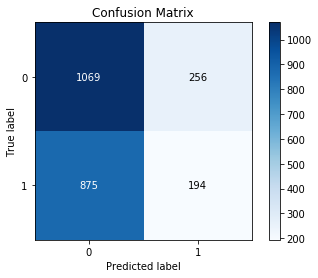

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

X = np.vstack(test['final_embedding'].as_matrix())
y = test['stance'].values.ravel()

evaluate_train(X, y, LogisticRegression())

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Train Log loss: 0.678300326251
Train Accuracy: 0.557226399332


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

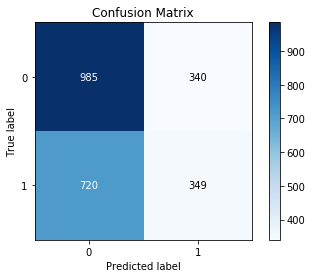

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X = np.vstack(test['final_embedding'].as_matrix())
y = test['stance'].values.ravel()

evaluate_train(X, y, RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))